### Imports

In [1]:
import os
import tables            as tb
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from antea  .io.mc_io_tb import read_mcsns_response
from astropy.coordinates import Angle

## Required time of the simulation
#### From the log file, the following information has been taken

In [2]:
## NEXUS initial file
time_starting_sim1  = Angle('2h54m13s')
time_finishing_sim1 = Angle('4h28m25s')
sim_time1 = time_finishing_sim1 - time_starting_sim1
print('NEXUS initial file:')
print('Total time required simulation 1: ', round(sim_time1.hour * 60, 2), ' min')
print('')

## NEXUS only save charge above threshold (2 pes)
time_starting_sim2  = Angle('2h54m21s')
time_finishing_sim2 = Angle('4h27m7s')
sim_time2 = time_finishing_sim2 - time_starting_sim2
print('NEXUS only save charge above threshold (2 pes):')
print('Total time required simulation 2: ', round(sim_time2.hour * 60, 2), ' min')

NEXUS initial file:
Total time required simulation 1:  94.2  min

NEXUS only save charge above threshold (2 pes):
Total time required simulation 2:  92.77  min


## Size of the different files

In [3]:
path = '/data5/users/carmenromo/testing_nexus/data_ring/'
file1 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test1.1000.pet.h5'
file2 = path+'full_ring_iradius165mm_z140mm_depth3cm_pitch7mm_test2.1000.pet.h5'

total_size1 = os.path.getsize(file1)
total_size2 = os.path.getsize(file2)
print('NEXUS initial file:')
print(f"{round(total_size1/1e6, 2)} Mb (15000 events simulated)")
print('')
print('NEXUS only save charge above threshold (2 pes):')
print(f"{round(total_size2/1e6, 2)} Mb (15000 events simulated)")

NEXUS initial file:
280.91 Mb (15000 events simulated)

NEXUS only save charge above threshold (2 pes):
232.68 Mb (15000 events simulated)


### Check that the initial file extracting charges below threshold is equal to the new file

In [4]:
from antea.io.mc_io import load_mcsns_response
from antea.io.mc_io import load_mcTOFsns_response
from antea.io.mc_io import load_mcparticles

In [5]:
sns_response1 = load_mcsns_response(file1)
sns_response2 = load_mcsns_response(file2)

In [40]:
df_above_thr1 = sns_response1[sns_response1.charge > 2].reset_index()
df_above_thr1 = df_above_thr1.drop('index', axis=1)

assert len(df_above_thr1) == len(sns_response2)
print(df_above_thr1.equals(sns_response2))

True


### Plot the results:

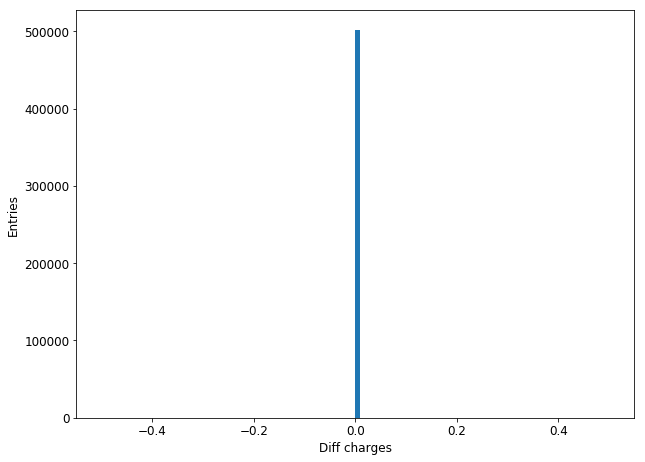

In [44]:
sub_charges = df_above_thr1.charge - sns_response2.charge

plt.rcParams["font.size"] = 12
fig = plt.figure(1)
fig.set_figwidth(10.)
fig.set_figheight(7.5)
plt.hist(sub_charges, 100)
plt.xlabel('Diff charges')
plt.ylabel('Entries')
plt.show()

## TOF:

In [27]:
sns_response_tof1 = load_mcTOFsns_response(file1)
sns_response_tof2 = load_mcTOFsns_response(file2)

In [77]:
print(len(sns_response_tof1))
print(len(sns_response_tof2))

5351188
4018274


In [30]:
sns_response_tof2.head()

,event_id,sensor_id,time_bin,charge
0,15000000,1330,0,1
1,15000000,1330,0,1
2,15000000,1330,0,1
3,15000000,1330,0,1
4,15000000,1330,0,1


In [95]:
particles2 = load_mcparticles(file2)
events2    = particles2.event_id.unique()
for evt in range(15000001, 15000002):#events2:
    waveforms2     = sns_response2[sns_response2.event_id == evt]
    sipms2         = waveforms2.sensor_id.values
    
    tof_waveforms1 = sns_response_tof1[sns_response_tof1.event_id == evt]
    tof_waveforms2 = sns_response_tof2[sns_response_tof2.event_id == evt].reset_index()
    tof_waveforms2 = tof_waveforms2.drop('index', axis=1)
    sipms1         = tof_waveforms1.sensor_id.values
    tof_waveforms1 = tof_waveforms1[np.isin(-sipms1, sipms2)].reset_index()
    tof_waveforms1 = tof_waveforms1.drop('index', axis=1)
    print(tof_waveforms1.equals(tof_waveforms2))

False
